Aplicação em R/Python que faz análise dos dados e gera gráficos

01 - Importação das bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

02 - Importação do arquivo CSV com os dados

In [3]:
# 1. Carregar o arquivo CSV

df = pd.read_csv("src\data\simulated_climate_risk_data.csv")


print("Base carregada com sucesso!")
df.sample(10)

Base carregada com sucesso!


,timestamp,temperature_c,humidity_pct,heat_index_c,risk_label
708,2025-06-12T12:56:55.620277,28.416912,75.935136,32.455681,0
492,2025-06-10T13:24:55.620277,26.992876,62.105364,28.225485,0
637,2025-06-13T23:22:55.620277,26.527388,62.577939,27.652313,0
202,2025-06-18T19:40:55.620277,38.734174,90.034714,85.991466,3
941,2025-06-15T21:12:55.620277,36.982085,69.200716,57.555742,3
483,2025-06-11T12:41:55.620277,29.260012,68.380649,32.985184,0
1060,2025-06-13T01:56:55.620277,32.587858,73.196751,43.502788,2
1184,2025-06-12T02:47:55.620277,32.855678,68.555553,42.411204,2
1779,2025-06-10T08:49:55.620277,23.875120,50.417299,23.875120,0
1296,2025-06-19T19:36:55.620277,36.708730,81.362311,65.744517,3


03 - Verificando a estrutura da base:

In [4]:
print("Informações da base:")
print(df.info())
print("\n Estatísticas descritivas:")
print(df.describe())

Informações da base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      2000 non-null   object 
 1   temperature_c  2000 non-null   float64
 2   humidity_pct   2000 non-null   float64
 3   heat_index_c   2000 non-null   float64
 4   risk_label     2000 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 78.3+ KB
None

 Estatísticas descritivas:
       temperature_c  humidity_pct  heat_index_c   risk_label
count    2000.000000   2000.000000   2000.000000  2000.000000
mean       31.403542     67.091883     44.450496     1.466000
std         5.610266     14.064582     20.313585     1.397791
min        16.236637     31.244160     17.089976     0.000000
25%        27.598152     56.914301     28.487238     0.000000
50%        32.094347     67.362558     39.410370     1.000000
75%        35.561773     77.172451 

04 - Verificando valores ausentes:

In [7]:
print("\n Valores ausentes por coluna:")
print(df[["temperature_c", "humidity_pct", "heat_index_c", "timestamp"]].isna().sum())


 Valores ausentes por coluna:
temperature_c    0
humidity_pct     0
heat_index_c     0
timestamp        0
dtype: int64


05 - Preenchendo valores ausentes por interpolação linear

In [8]:
df_interpolated = df.interpolate(method="linear")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9060\2623931684.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate(method="linear")


In [10]:
print("\n Valores ausentes por coluna:")
print(df_interpolated[["temperature_c", "humidity_pct", "heat_index_c"]].isna().sum())


 Valores ausentes por coluna:
temperature_c    0
humidity_pct     0
heat_index_c     0
dtype: int64


06 - Verificando valores duplicados de data

In [17]:
duplicadas = df_interpolated["timestamp"].duplicated()

# Contar linhas duplicadas
contagem_duplicatas = df_interpolated.duplicated().sum()
print(f"Número de linhas duplicadas: {contagem_duplicatas}")

Número de linhas duplicadas: 0


07 - Removendo datas duplicadas

In [19]:
df_nduplicado = df_interpolated.drop_duplicates(subset=["timestamp"], keep="first")

08 - Verificar dados inconsistentes

In [14]:
# Verificando valores fora de faixas esperadas (exemplo de checagem simples)
print("\nValores fora de faixas comuns:")
print("Temperatura negativa:", (df_nduplicado["temperature_c"] < 0).sum())
print("Temperatura muito alta:", (df_nduplicado["temperature_c"] > 50).sum())
print(
    "Umidade fora da faixa [0, 100]:",
    ((df_nduplicado["humidity_pct"] < 0) | (df_nduplicado["humidity_pct"] > 100)).sum(),
)


Valores fora de faixas comuns:
Temperatura negativa: 0
Temperatura muito alta: 0
Umidade fora da faixa [0, 100]: 0


09 - Removendo dados inconsistentes

In [20]:
df_limpo = df_nduplicado.drop(df_nduplicado[df_nduplicado["temperature_c"] > 50].index)
df_limpo = df_limpo.drop(df_limpo[df_limpo["temperature_c"] < 0].index)
df_limpo = df_limpo.drop(df_limpo[df_limpo["humidity_pct"] > 100].index)
df_limpo = df_limpo.drop(df_limpo[df_limpo["humidity_pct"] < 0].index)
print("\nVerificação valores fora de faixas comuns:")
print("Temperatura negativa:", (df_limpo["temperature_c"] < 0).sum())
print("Temperatura muito alta:", (df_limpo["temperature_c"] > 50).sum())
print(
    "Umidade fora da faixa [0, 100]:",
    ((df_limpo["humidity_pct"] < 0) | (df_nduplicado["humidity_pct"] > 100)).sum(),
)


Verificação valores fora de faixas comuns:
Temperatura negativa: 0
Temperatura muito alta: 0
Umidade fora da faixa [0, 100]: 0


10 - Verificando a estrutura da base limpa

In [22]:
print("Informações da base:")
print(df_limpo.info())
print("\n Estatísticas descritivas:")
print(df_limpo.describe())

Informações da base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      2000 non-null   object 
 1   temperature_c  2000 non-null   float64
 2   humidity_pct   2000 non-null   float64
 3   heat_index_c   2000 non-null   float64
 4   risk_label     2000 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 78.3+ KB
None

 Estatísticas descritivas:
       temperature_c  humidity_pct  heat_index_c   risk_label
count    2000.000000   2000.000000   2000.000000  2000.000000
mean       31.403542     67.091883     44.450496     1.466000
std         5.610266     14.064582     20.313585     1.397791
min        16.236637     31.244160     17.089976     0.000000
25%        27.598152     56.914301     28.487238     0.000000
50%        32.094347     67.362558     39.410370     1.000000
75%        35.561773     77.172451 

10 - Análise gráfica

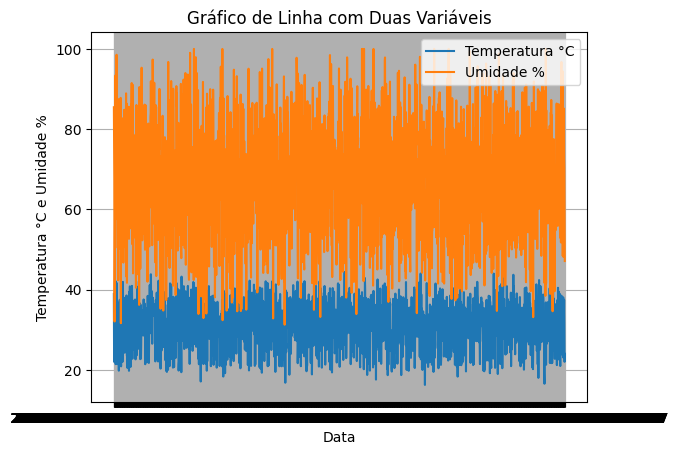

In [23]:
# Criação do gráfico
plt.plot(df_limpo["timestamp"], df_limpo["temperature_c"], label="Temperatura °C")
plt.plot(df_limpo["timestamp"], df_limpo["humidity_pct"], label="Umidade %")

# Personalização do gráfico
plt.xlabel("Data")
plt.ylabel("Temperatura °C e Umidade %")
plt.title("Gráfico de Linha com Duas Variáveis")
plt.legend()
plt.grid(True)

# Exibe o gráfico
plt.show()

In [24]:
# Correlação entre Temperatura e Umidade
df_perigo_umidade = df_limpo.loc[
    df_limpo["humidity_pct"] < 40, ["timestamp", "temperature_c", "humidity_pct"]
]
df_perigo_temperatura = df_limpo.loc[
    df_limpo["temperature_c"] > (df_limpo["temperature_c"].mean() + 5), ["timestamp", "temperature_c", "humidity_pct"]
]

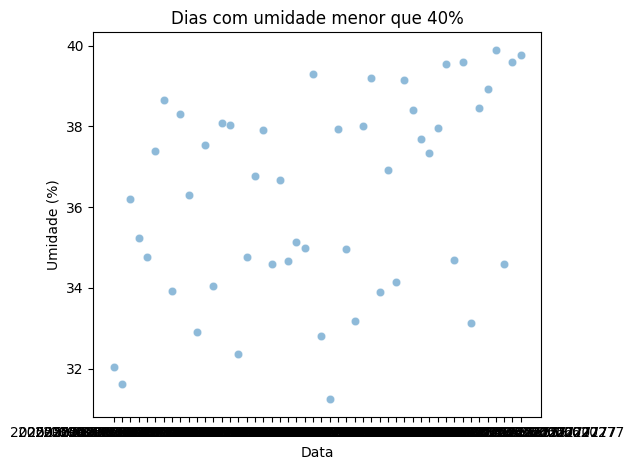

In [25]:
# Dias com umidade menor que 40%
plt.figure()
sns.scatterplot(data=df_perigo_umidade, x="timestamp", y="humidity_pct", alpha=0.5)
plt.title("Dias com umidade menor que 40%")
plt.xlabel("Data")
plt.ylabel("Umidade (%)")
plt.tight_layout()
plt.show()

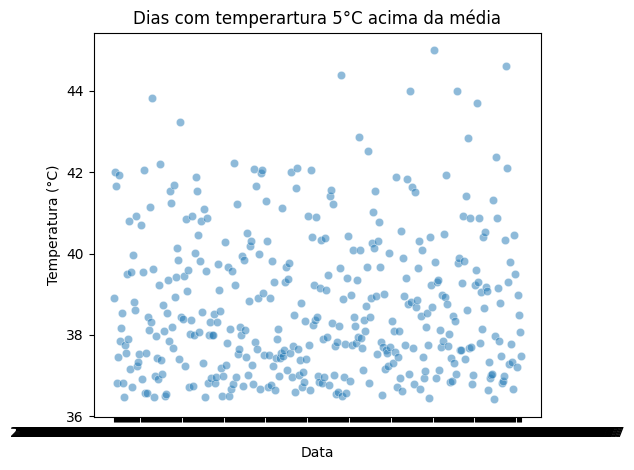

In [26]:
# Dias com temperatura 5° acima da média
plt.figure()
sns.scatterplot(data=df_perigo_temperatura, x="timestamp", y="temperature_c", alpha=0.5)
plt.title("Dias com temperartura 5°C acima da média")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")
plt.tight_layout()
plt.show()

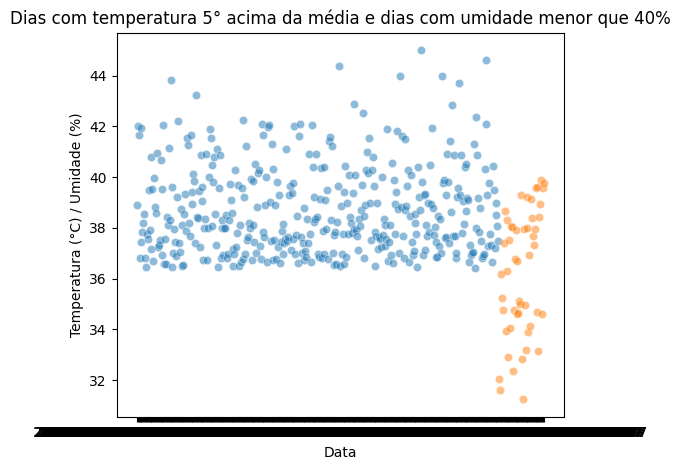

In [27]:
# Dias com temperatura 5° acima da média e dias com umidade menor que 40%
plt.figure()
sns.scatterplot(data=df_perigo_temperatura, x="timestamp", y="temperature_c", alpha=0.5)
sns.scatterplot(data=df_perigo_umidade, x="timestamp", y="humidity_pct", alpha=0.5)
plt.title("Dias com temperatura 5° acima da média e dias com umidade menor que 40%")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C) / Umidade (%)")
plt.tight_layout()
plt.show()